DAT 350 MP2. I am apart of an upcoming video game development company and I have been tasked with taking this dataset which consists of different video game devolpers, their games, the games ratings, the release dates, genres: and figuring out what is the best type of game, what rating it had, whats the best genre to go into, and finally when is the best time to ultimately release this game. The who in my data set is all the video game devlopers. The what is video games and their respective ratings. The when consists of when the best games were released. The dataset doesn't consist of a how or a why.

First we want to find the top 10 video game publishers based on the number of games they have in the dataset. More games = popular publisher because if not they wouldnt have any games in the dataset.

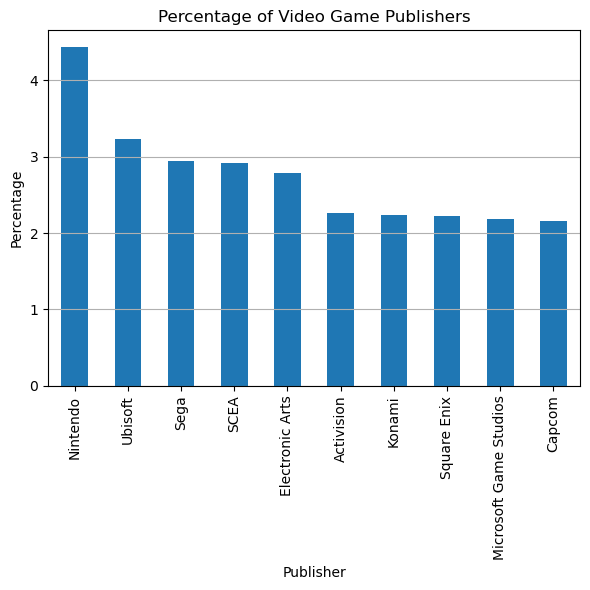

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('all_video_games(cleaned).csv')

publisher_counts = dataset['Publisher'].value_counts(normalize=True) * 100

filtered_publishers = publisher_counts[publisher_counts >= 2]

plt.figure(figsize=(6, 6))
filtered_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.title('Percentage of Video Game Publishers')
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()


So we can see that the top 10 publishers in the dataset are : 
1. Nintendo
2. Ubisoft
3. Sega
4. SCEA
5. Electronic Arts
6. Activision 
7. Konami
8. Square Enix
9. Microsoft Game Studios
10. Capcom

Now i want similar code to show a histogram of the top 10 genres for these 10 publishers

<function matplotlib.pyplot.show(close=None, block=None)>

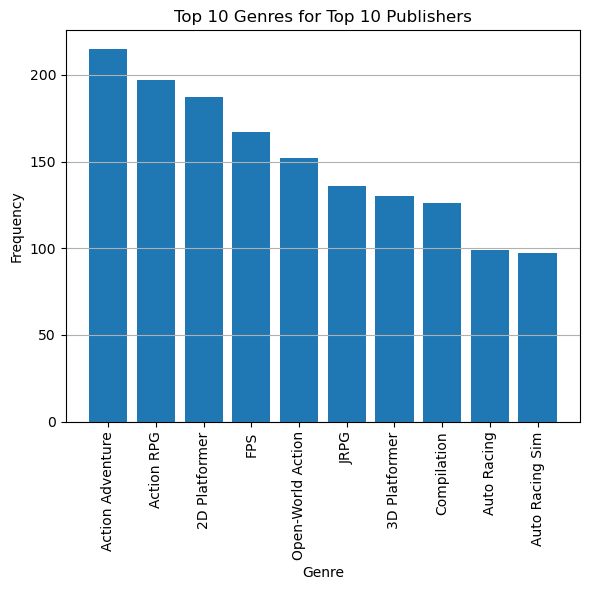

In [18]:
top_publishers = ['Nintendo', 'Ubisoft', 'Sega', 'SCEA', 'Electronic Arts', 'Activision', 'Konami', 'Square Enix', 'Microsoft Game Studios', 'Capcom']
filtered_dataset = dataset[dataset['Publisher'].isin(top_publishers)]
genre_counts = filtered_dataset['Genres'].value_counts()
top_genres = genre_counts.head(10)

plt.figure(figsize = (6, 6))
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Top 10 Genres for Top 10 Publishers')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show


So here we can see that the top 10 video game genres for our top 10 Publishers are:
1. Action Adventure 
2. Action RPG
3. 2D platformer
4. FPS
5. Open World Adventure
6. JRPG
7. 3D Platformer
8. Compilation
9. Auto Racing 
10. Auto Racing Sim

/var/folders/gm/h0q0k6ks7zq5jp8c7x46bl1h0000gn/T/ipykernel_2337/918760740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['User Score'] = pd.to_numeric(filtered_dataset['User Score'], errors='coerce')


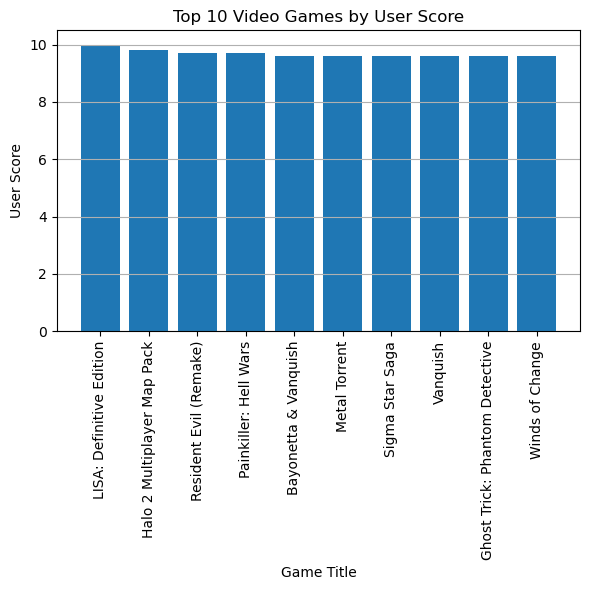

In [24]:
filtered_dataset = dataset[['Title', 'User Score']]
filtered_dataset['User Score'] = pd.to_numeric(filtered_dataset['User Score'], errors='coerce')
filtered_dataset = filtered_dataset.dropna(subset=['User Score'])
top_games = filtered_dataset.sort_values(by='User Score', ascending=False).head(10)

plt.figure(figsize=(6, 6))
plt.bar(top_games['Title'], top_games['User Score'])
plt.xlabel('Game Title')
plt.ylabel('User Score')
plt.title('Top 10 Video Games by User Score')
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()

So here we can see what our top 10 games are in the dataset.
1. LISA: Definitive Edition, Serenity Forge, RPG
2. Halo 2 Multiplayer Map Pack, Microsoft Game Studios, FPS
3. Resident Evil (Remake), Capcom, Action - Adventure 
4. Pain Killer: Hell Wars, DreamCatcher Interactive, FPS
5. Bayonetta & Vanquish, Sega, Action - Adventure
6. Metal Torrent, Nintendo, FPS
7. Sigma Star Saga, Bandai Namco, RPG 
8. Vanquish, Sega, Action - Adventure 
9. Ghost Trick: Phantom Detective, Capcom, Action - Adventure 
10. Winds of Change, Tall Tail Studio, Action - Adventure

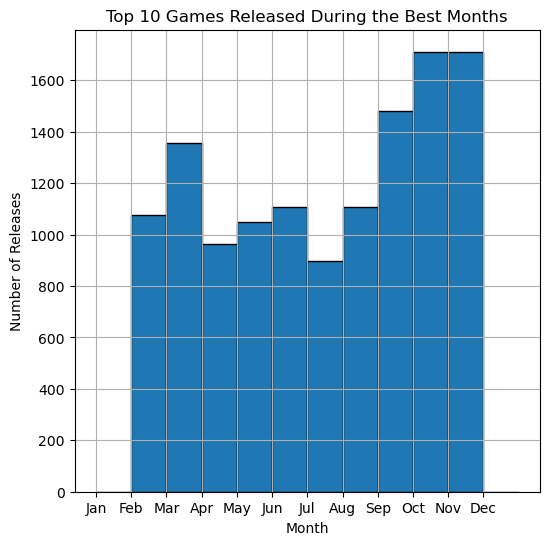

In [27]:
dataset['Release Month'] = pd.to_datetime(dataset['Release Date']).dt.month

monthly_counts = dataset['Release Month'].value_counts()

top_months = monthly_counts.head(10)

filtered_dataset = dataset[dataset['Release Month'].isin(top_months.index)]

plt.figure(figsize=(6, 6))
plt.hist(filtered_dataset['Release Month'], bins=range(1, 14), edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Top 10 Games Released During the Best Months')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [28]:
dataset = dataset.dropna(subset=['User Score'])

correlation_coefficient = dataset['User Score'].corr(dataset['Release Month'])

print("Pearson correlation coefficient between user score and release month:", correlation_coefficient)


Pearson correlation coefficient between user score and release month: 0.01197175038178309


In [ ]:
dataset['publisher_label'] = dataset['publishers'].astype('category').cat.codes

dataset = dataset.dropna(subset=['user core'])

correlation_coefficient = dataset['publisher_label'].corr(dataset['user_score'])

print("Pearson correlation coefficient between publisher and user score:", correlation_coefficient)